# Chronic Kidney Disease Prediction
In this machine learning project, we will predict whether a person is suffering from a Chronic Kidney Disease or not.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Data set

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# Lets check the shape of the dataset

df.shape

(400, 26)

### Exploratory Data Analysis (EDA)

In [4]:
# Lets check some information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
# Lets check for null values

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

There are some amount of null values present in the data. 

In [6]:
# Lets rename the some of the feature names for better understanding

cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [7]:
# Lets see our dataset now

df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# Lets seperate the numerical and the categorical features

numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique() > 7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [9]:
# Lets see the unique categories of each categorical features

for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [10]:
# Lets change the values of "\tno", "\tyes" and "ckd\t" to "no", "yes" and "ckd" respectively

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = '\tno', value = 'no')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = '\tyes', value = 'yes')
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [11]:
# Lets check

for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' nan] categories.

coronary_artery_disease has ['no' 'yes' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



In [12]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = '\tno', value = 'no')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = '\tyes', value = 'yes')
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

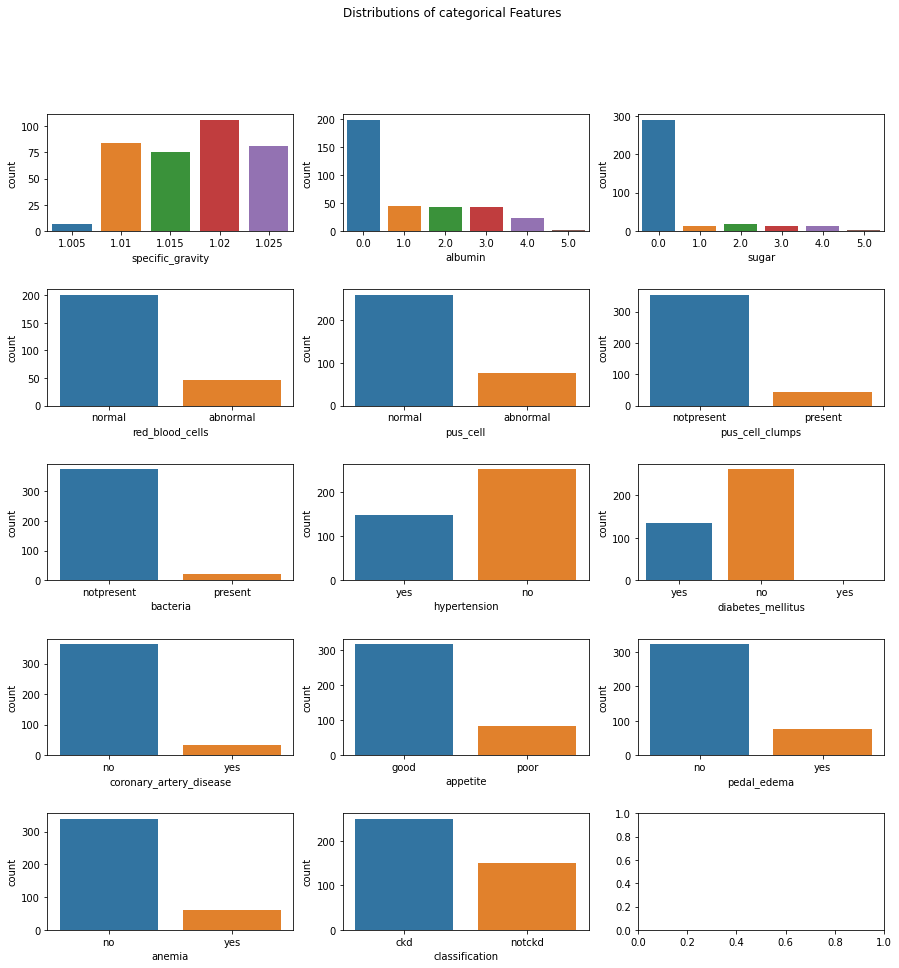

In [13]:
# Countplot for categorical features

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

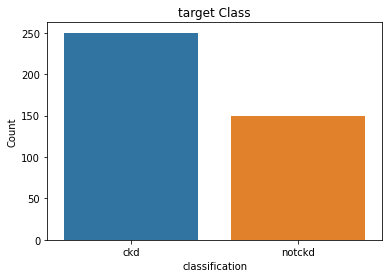

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [14]:
# Count plot to see the unique value proportion within our target feature

sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

The Data set is balanced.

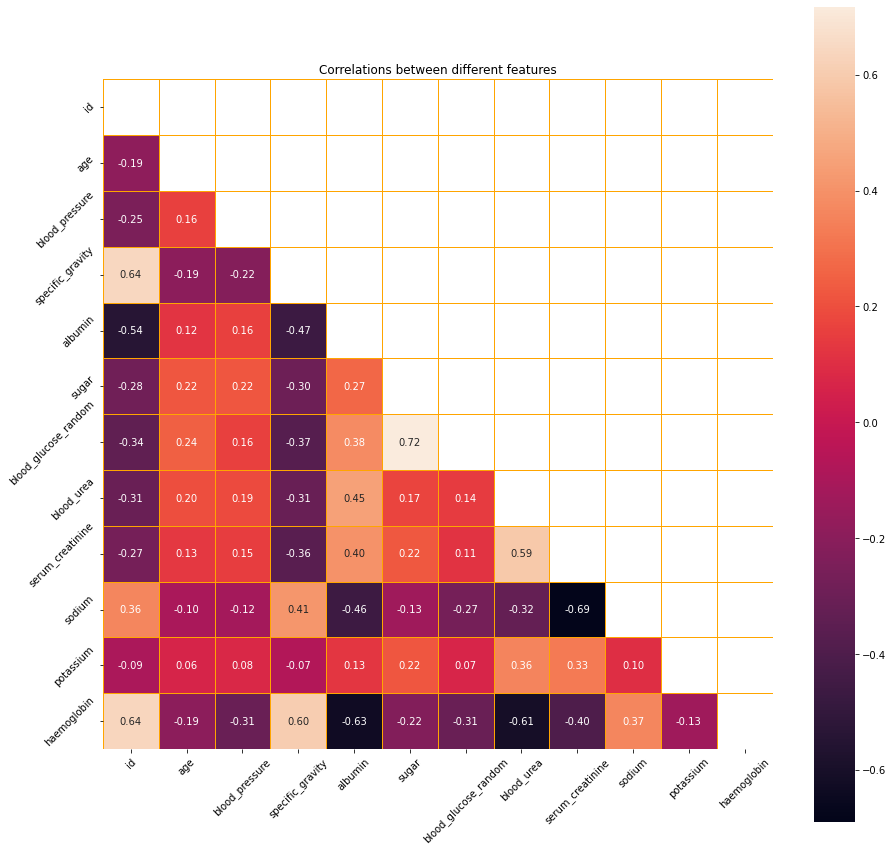

In [15]:
# Correlation Heatmap

corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different features')
plt.show()

In [16]:
# Lets see the unique categories of each numerical features

for feats in numerical_features:
    print(f'{feats} has {df[feats].unique()} values.\n')

id has [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [17]:
# Label Encoding

df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
df[['red_blood_cells','pus_cell']] = df[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
df[['pus_cell_clumps','bacteria']] = df[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
df[['appetite']] = df[['appetite']].replace(to_replace={'good':1,'poor':0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'notckd':0.0})
df.rename(columns={'classification':'class'},inplace=True)


In [18]:
# Lets drop the "id" feature as it is not that important

df.drop('id',axis=1,inplace=True)

In [19]:
# Lets drop the nan values

df = df.dropna(axis=0)

In [20]:
# Feature Selection

cols = ['blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps']

In [21]:
# Independent and Dependent features

X = df[cols]
y = df['class']

In [22]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44, stratify= y)

In [23]:
# Lets see the shape of our train and test dataset

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(105, 7), y:(105,)
Shape test set: X:(53, 7), y:(53,)


### Model Building

In [24]:
from sklearn.svm import SVC

In [25]:
# Initializing the model

model = SVC(kernel = "linear")

In [26]:
# Fitting the model

model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
# Prediction

y_pred = model.predict(X_test)

In [29]:
# Validation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9811320754716981
[[39  1]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        40
         1.0       0.93      1.00      0.96        13

    accuracy                           0.98        53
   macro avg       0.96      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



### Hyperparameter Optimization

In [30]:
#from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Setting the parameters

#param_grid = {"C" :[0.1, 1, 10, 100],
             #"gamma" : [1, 0.1, 0.01, 0.001],
             #"kernel" : ["linear"]}

In [32]:
# Initializing the model

#SVC_model = SVC()

In [33]:
# Initializing the Hyperparameters

#rf_grid = RandomizedSearchCV(estimator = SVC_model, param_distributions = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [34]:
# Model fitting

#rf_grid.fit(X_train, y_train)

In [35]:
# Getting the best parameters

#rf_grid.best_params_

In [36]:
# Getting the best estimators

#rf_grid.best_estimator_

In [37]:
# Initializing the model with the best parameters

#model = SVC()

In [38]:
# Fitting the model with the best parameters

#model.fit(X_train, y_train)

In [39]:
# Prediction

#y_pred = model.predict(X_test)

In [40]:
# Validation

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#print(accuracy_score(y_pred, y_test))
#print(confusion_matrix(y_pred, y_test))
#print(classification_report(y_pred, y_test))


### Saving the model to reuse again

In [41]:
import joblib
joblib.dump(model,r"C:\Users\SWARNAVA\Desktop\Healthcare\Kidney\kidney_model.pkl")

['C:\\Users\\SWARNAVA\\Desktop\\Healthcare\\Kidney\\kidney_model.pkl']